# Introduction

### Domain:
Financial Markets Analysis

### Sub-Domain:
Loan Prediction

### Problem Statement:
It is expected that the development of ML model that can help the company predict loan approval in **accelerating decision-making process** for determining whether an applicant is eligible for a loan or not.


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.svm import SVC

# Reading Data Set
After importing libraries, we will also import the dataset that will be used.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/loan_data_set.csv")
df_raw = pd.read_csv("/loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(df.shape)

(614, 13)


# Data Exploration
This section will perform data exploration of "raw" data set that has been imported.

## *Categorical Variable*
The first type of variable that I will explore is categorical variable.



### Self Employed

In [ ]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

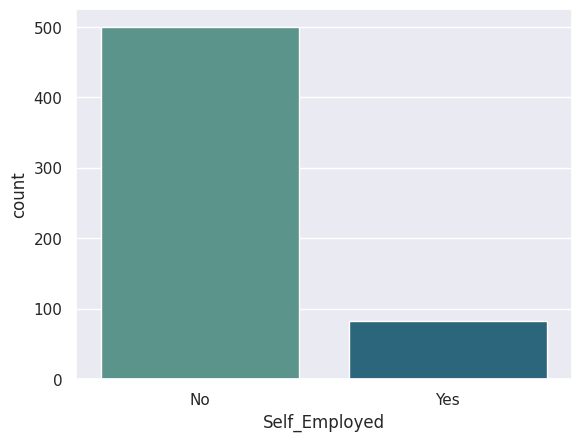

In [ ]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [ ]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column.

### Credit History

In [ ]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

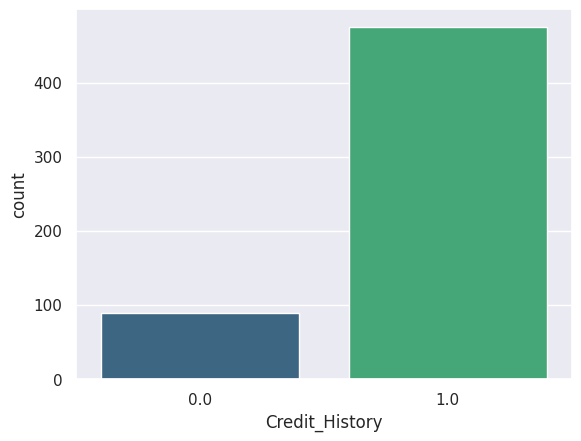

In [ ]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [ ]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

### Loan Status

In [ ]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

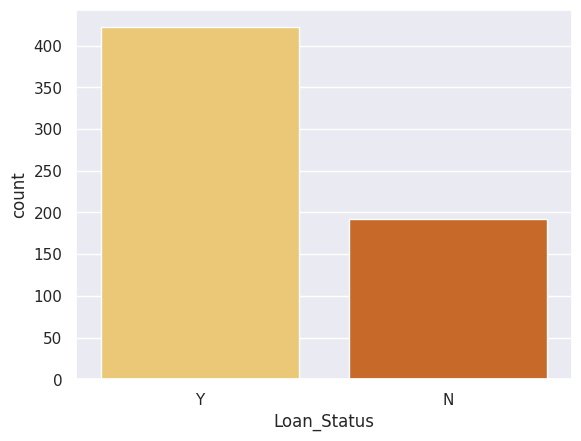

In [ ]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [ ]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

### Loan Amount Term

In [ ]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

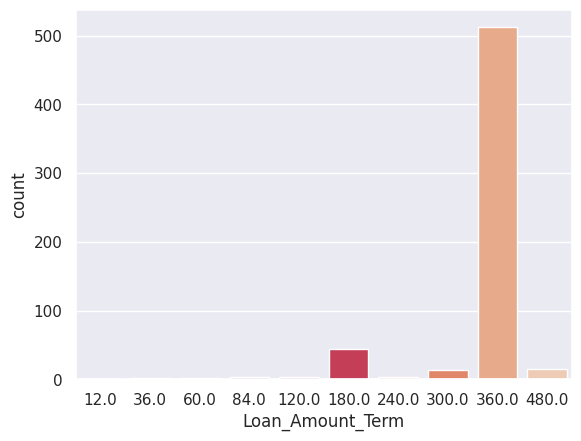

In [ ]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [ ]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


 As can be seen from the results, **the 360 days loan duration is the most popular** compared to others.

## *Numerical Variable*
The second variable that explored is categorical variable.

### Describe Numerical Variable
This section will show mean, count, std, min, max and others using describe function.


In [ ]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


Mathematical Formulation: Mean & Standard Deviation

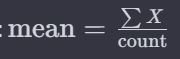

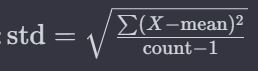


### Distribution of Numerical Variable
This section will show the distribution of numerical variable using histogram.

#### Histogram Distribution

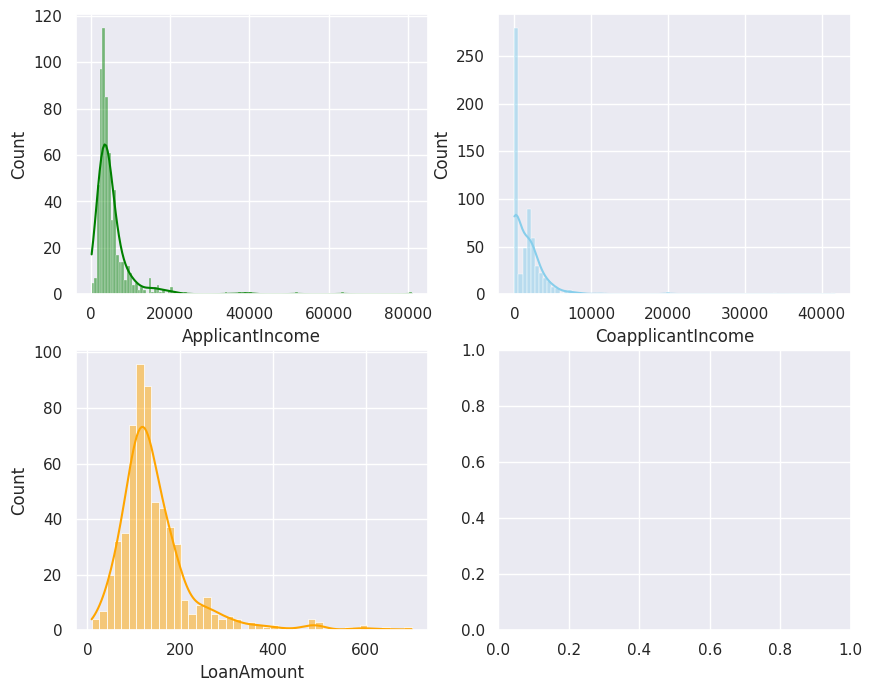

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

The distribution of **Applicant income, Co Applicant Income, and Loan Amount** are **positively skewed** and **it has outliers**




## *Bivariate analysis*
This section will show additional exploration from each variables. The additional exploration are:
*    categorical w/ categorical
*   categroical w/ numerical
*   numerical w/ numerical






### *Categorical  - Categorical*

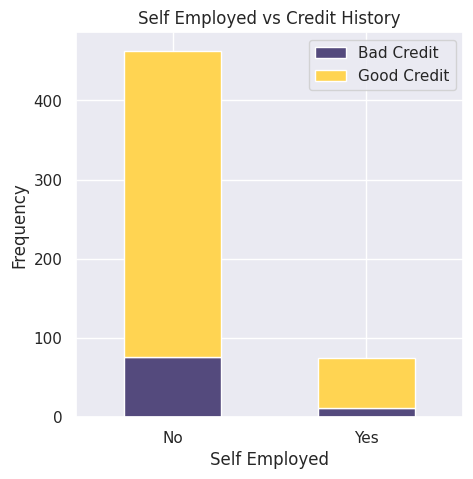

In [ ]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, \
                                                     figsize=(5,5),color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

Most not self employed applicants have good credit compared to self employed applicants.

### *Categorical - Numerical*

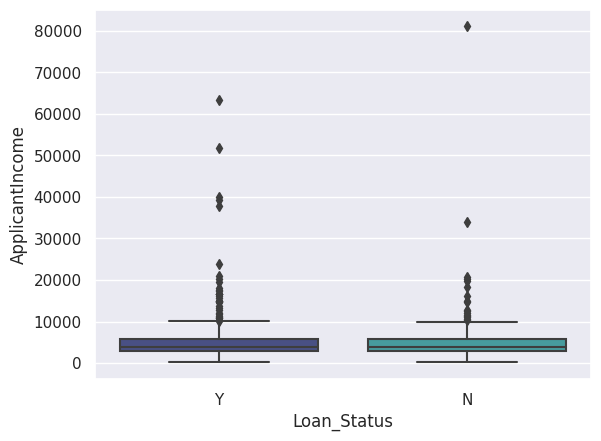

In [ ]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

### *Numerical - Numerical*

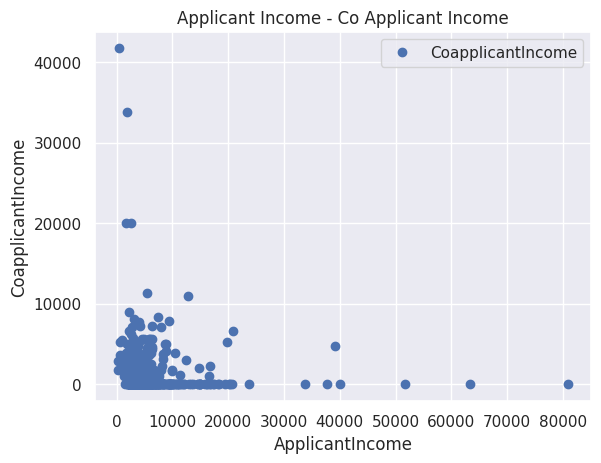

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40, df=1226.0)


In [ ]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
plt.title('Applicant Income - Co Applicant Income')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

*   There is **negative correlation** between Applicant income and Co Applicant Income.
*   The correlation coefficient is **significant** at the 95 per cent confidence interval, as it has a **p-value of 1.46**


Mathematical Formulation: Pearson Coefficient

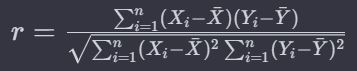


## *Null Values*

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

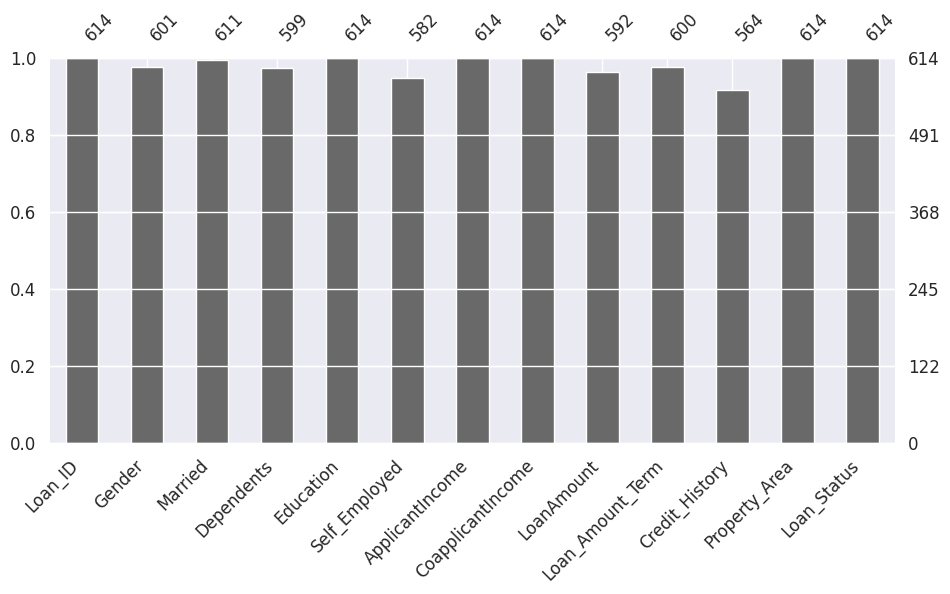

In [ ]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

Previously, the null values has been explored for Categorical Variables. In this section, the null values has been explored **for all variables** in the dataset.

# Data Preprocessing

####Drop Unnecessary Variables


In [ ]:
df = df.drop(['Loan_ID'], axis=1)
df_raw = df_raw.drop(['Loan_ID'], axis=1)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_raw.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


####Remove Missing Values - Approach 1 to handle missing values

In [ ]:
df_raw.dropna(inplace=True)

####Data Imputation - Approach 2 to handle missing values
Imputation is a technique for substituting an estimated value for missing values in a dataset. The imputation will be performed for variables that have missing values.

*Categorical Variables*

The imputation for categorical variables will be performed using **mode**.

In [ ]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

*Numerical Variables*

This imputation for numerical variables using **mean**.

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


####Dropping Categorical Variables - Approach 1 to handle categorical data

Categorical data needs to be handled since SVM algorithm doesnot support non-numerical data values.

In [ ]:
df_raw = df_raw.drop(['Gender', 'Married', 'Education','Self_Employed', 'Property_Area','Dependents' ], axis = 1)

In [ ]:
df_raw.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,4583,1508.0,128.0,360.0,1.0,N
2,3000,0.0,66.0,360.0,1.0,Y
3,2583,2358.0,120.0,360.0,1.0,Y
4,6000,0.0,141.0,360.0,1.0,Y
5,5417,4196.0,267.0,360.0,1.0,Y


####One-hot Encoding - Approach 2 to handle categorical data
Here, transform categorical variables into a form that could be provided by ML algorithms to do a better prediction.

In [ ]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)

In [ ]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1


####Remove Outliers & Infinite values
Since there are outliers, **the outliers will be removed**.


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
13,1853,2840.0,114.000000,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0
15,4950,0.0,125.000000,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
19,2600,3500.0,115.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1


####Skewed Distribution Treatment
Previously, it was already shown that **distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed**. <br>
So, **square root transformation** to normalized the distribution will be used.

In [ ]:
# Square Root Transformation
df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

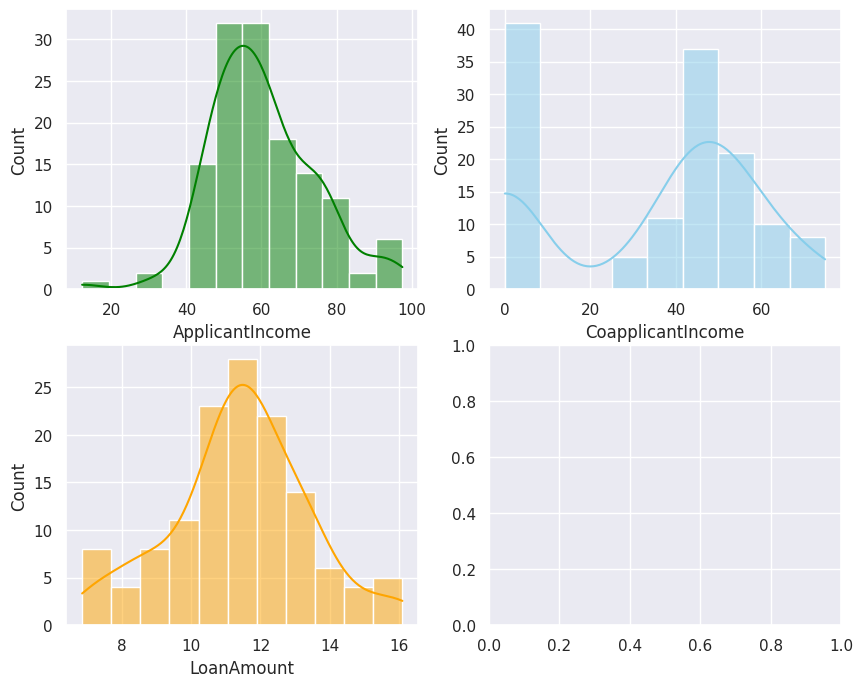

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

As can be seen, the distribution after using log transformation are much better compared to original distribution.

####Features Separating
Dependent features (Loan_Status) will be seperated from independent features.

In [ ]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

X_raw = df_raw.drop(["Loan_Status"], axis=1)
y_raw = df_raw["Loan_Status"]

In [ ]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,76.478755,0.000000,12.100089,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
4,77.459667,0.000000,11.874342,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
13,43.046487,53.291650,10.677078,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0,0
15,70.356236,0.000000,11.180340,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
19,50.990195,59.160798,10.723805,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1


In [ ]:
df_raw.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,4583,1508.0,128.0,360.0,1.0,N
2,3000,0.0,66.0,360.0,1.0,Y
3,2583,2358.0,120.0,360.0,1.0,Y
4,6000,0.0,141.0,360.0,1.0,Y
5,5417,4196.0,267.0,360.0,1.0,Y


####SMOTE Technique
Previously, it was seen that **the number between approved and rejected loan is imbalanced**.
In this section, **oversampling technique will be used to avoid overfitting**,

In [ ]:
X, y = SMOTE().fit_resample(X, y)

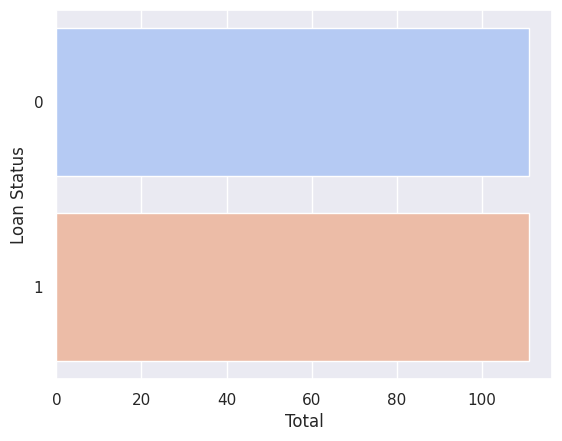

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

As can be seen, the distrubtion of Loan status are now **balanced**.

####Data Normalization
 data normalization will be performed **to normalize the range of independent variables or features of data**.

In [ ]:
pd.DataFrame(X).head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,76.478755,0.000000,12.100089,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
1,77.459667,0.000000,11.874342,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
2,43.046487,53.291650,10.677078,360.0,1.0,1,0,1,0,0,0,1,0,1,0,0
3,70.356236,0.000000,11.180340,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1
4,50.990195,59.160798,10.723805,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1


In [ ]:
X = MinMaxScaler().fit_transform(X)

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.753345,0.000000,0.567713,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.764849,0.000000,0.543276,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.361230,0.710555,0.413671,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.681536,0.000000,0.468150,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.454399,0.788811,0.418730,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Mathematical Formulation: MinMax Normalization

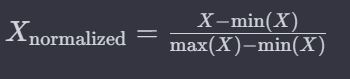


####Splitting Data Set
The data set will be split into **80% train and 20% test**.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size = 0.2, random_state = 0)

# Model

## Support Vector Machine (SVM)

SVC trained with **PARTIALLY** pre-processed data:

In [ ]:
SVCclassifier_raw = SVC(kernel='rbf', max_iter=500)
SVCclassifier_raw.fit(X_raw_train, y_raw_train)

y_raw_pred = SVCclassifier_raw.predict(X_raw_test)

print(classification_report(y_raw_test, y_raw_pred))
print(confusion_matrix(y_raw_test, y_raw_pred))

SVCAcc_raw = accuracy_score(y_raw_pred,y_raw_test)
print('SVC_raw accuracy: {:.2f}%'.format(SVCAcc_raw*100))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        35
           Y       0.64      1.00      0.78        61

    accuracy                           0.64        96
   macro avg       0.32      0.50      0.39        96
weighted avg       0.40      0.64      0.49        96

[[ 0 35]
 [ 0 61]]
SVC_raw accuracy: 63.54%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0

SVC trained with **FULLY** pre-processed data:

In [ ]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.81      0.92      0.86        24

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45

[[16  5]
 [ 2 22]]
SVC accuracy: 84.44%


# Model Comparison

In [ ]:
accuracy = pd.DataFrame({'Model': ['SVC','SVC_RAW'], 'Accuracy': [SVCAcc*100, SVCAcc_raw*100]})
print(accuracy)

     Model   Accuracy
0      SVC  84.444444
1  SVC_RAW  63.541667


It can be seen that the accuracy achieved of the **model with the pre-processed data is 84.44%** which is much higher compared to the accuracy of the **model without pre-processed data which is 63.54%**


# Hyperparameter Tuning using GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

grid.fit(X_train,y_train)

grid_predictions = grid.predict(X_test)
print()
best_model = grid.best_estimator_
best_parameters = grid.best_params_
best_f1 = grid.best_score_
print()
print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)
print()
print(confusion_matrix(y_test,grid_predictions))
print()
print(classification_report(y_test,grid_predictions))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_test,grid_predictions)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

After tuning the hyperparamters, the **accuracy of the model has improved upto 86.67%**

Mathematical Formulation: f1-score

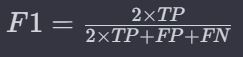



# Confusion Matrix

<Axes: >

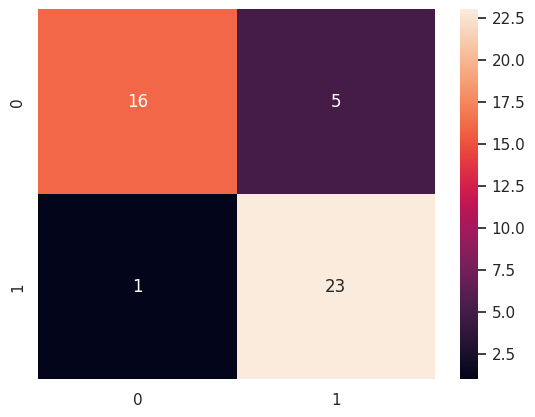

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,grid_predictions), annot=True)